<h1>Batch Normalization with the MNIST Dataset</h1>


<h2>Table of Contents</h2>
In this lab, you will build a Neural Network using Batch Normalization and compare it to a Neural Network that does not use Batch Normalization. You will use the MNIST dataset to test your network. 

<ul>
<li><a href="#Preparation">Preparation</a></li>    
<li><a href="#Train_Func">Neural Network Module and Training Function</a></li>
<li><a href="#Makeup_Data">Make Some Data</a></li>
<li><a href="#NN">Define Several Neural Networks, Criterion function, Optimizer</a></li>
<li><a href="#Train">Train Neural Network using Batch Normalization and no Batch Normalization</a></li>
<li><a href="#Result">Analyze Results</a></li>
</ul>

<a name="Preparation"><h2>Preparation</h2></a>


We'll need the following libraries:  


In [60]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

<a name="Train_Func"><h2 id="Train_Func">Neural Network Module and Training Function</h2></a>


Define the neural network module or class 


Batch before activation

In [61]:
class NetNormalization(nn.Module):
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetNormalization, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        
    def forward(self, x):
        x = torch.sigmoid(self.bn1(self.linear1(x)))
        x = torch.sigmoid(self.bn1(self.linear2(x)))
        x = self.linear3(x)
        return x

 Neural Network Module with two hidden layers using Batch Normalization


In [62]:
class NetBatchNorm(nn.Module):
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x)))
        x = self.bn2(torch.sigmoid(self.linear2(x)))
        x = self.linear3(x)
        return x

Neural Network Module with two hidden layers without Batch Normalization


In [63]:
class Net(nn.Module):
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

Define a function to train the model. In this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [64]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    metrics = {'training_loss':[], 'validation_accuracy':[]}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            model.train()
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            metrics['training_loss'].append(loss.data.item())
            
        correct = 0
        for x, y in validation_loader:
            model.eval()
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
            
        accuracy = 100 * (correct / len(validation_dataset))
        metrics['validation_accuracy'].append(accuracy)
    
    return metrics

<a name="Makeup_Data"><h2 id="Makeup_Data">Make Some Data</h2></a>


Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [65]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the validating dataset by setting the parameters train  <code>False</code> and convert it to a tensor by placing a transform object into the argument <code>transform</code>


In [66]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

create the training-data loader and the validation-data loader object 


In [67]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<a id="ref3"></a>
<a name="NN"><h2 align=center>Define Neural Network, Criterion function, Optimizer and Train the  Model  </h2></a>


Create the criterion function  


In [68]:
criterion = nn.CrossEntropyLoss()

Variables for Neural Network Shape <code>hidden_dim</code> used for number of neurons in both hidden layers.


In [69]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

<a name="Train"><h2 id="Train">Train Neural Network using Batch Normalization and no Batch Normalization </h2></a>


Train Neural Network with correct batch normalization

In [70]:
model_normalization = NetNormalization(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_normalization.parameters(), lr = 0.1)
training_results_normalization = train(model_normalization, criterion, train_loader, validation_loader, optimizer, epochs=5)

Train Neural Network using  Batch Normalization :


In [71]:
model_norm  = NetBatchNorm(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model_norm.parameters(), lr = 0.1)
training_results_Norm = train(model_norm, criterion, train_loader, validation_loader, optimizer, epochs=5)

Train Neural Network with no Batch Normalization:


In [72]:
model = Net(input_dim, hidden_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=5)

<a name="Result"><h2 id="Result">Analyze Results</h2></a>


Compare the training loss for each iteration


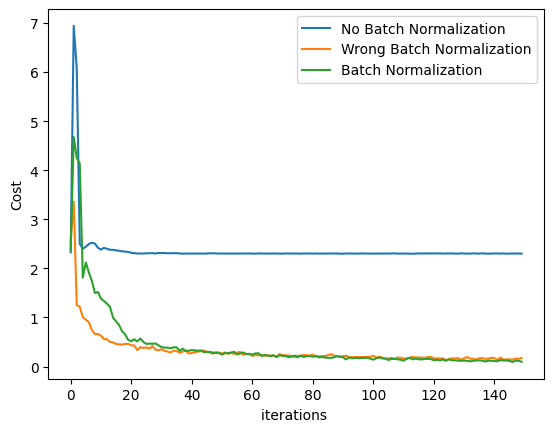

In [75]:
plt.plot(training_results['training_loss'], label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'], label='Wrong Batch Normalization')
plt.plot(training_results_normalization['training_loss'], label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')   
plt.legend()
plt.show()

Compare the validating accuracy for each iteration


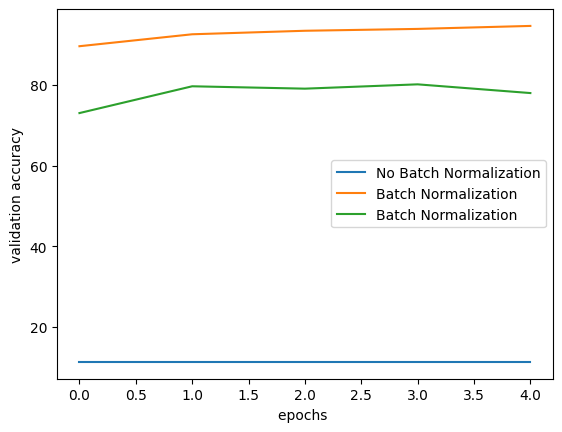

In [74]:
plt.plot(training_results['validation_accuracy'],label='No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'],label='Batch Normalization')
plt.plot(training_results_normalization['validation_accuracy'], label='Batch Normalization')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()